<h1 style="color:red">Load Liberaries</h1>

In [1]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import learning_curve
import joblib
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


<h1 style="color:red">Load Data Frame</h1>

In [2]:
all_dfs = pd.read_csv("All.csv")

<h1 style="color:red">Split Data to Train and Test</h1>

In [3]:
train_x, valid_x, train_y, valid_y = train_test_split(all_dfs['article'], all_dfs['group'],test_size=0.2, random_state=42)

<h1 style="color:red">Apply TF-IDF on Train and Test Data</h1>

In [4]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000000)
tfidf_vect.fit(all_dfs['article'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


joblib.dump(tfidf_vect, "pk1/general_tfidf.joblib")

['pk1/general_tfidf.joblib']

<h1 style="color:red">Save Test data and its Labels</h1>

In [5]:
joblib.dump(xvalid_tfidf, 'pk1/xvalid_tfidf.pk1')
joblib.dump(valid_y, 'pk1/valid_y.pk1')

['pk1/valid_y.pk1']

<h1 style="color:red">Train Template</h1>

In [6]:
def All_Models(model,model_name,x_train,y_train,x_test,y_test):
    #-----------------model fitting---------------
    history = model.fit(x_train,y_train)
    #----------Train Plot-----------------
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(8, 6))
    #plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='r', label='Cross-validation score')
    #plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='b')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='r')
    plt.xlabel('Number of training samples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()
    # ------------------------------save model---------------------------------
    joblib.dump(model, f"pk1/{model_name}.pk1")
    ###############################################################################################################


<h1 style="color:red">Naive Bayes</h1>

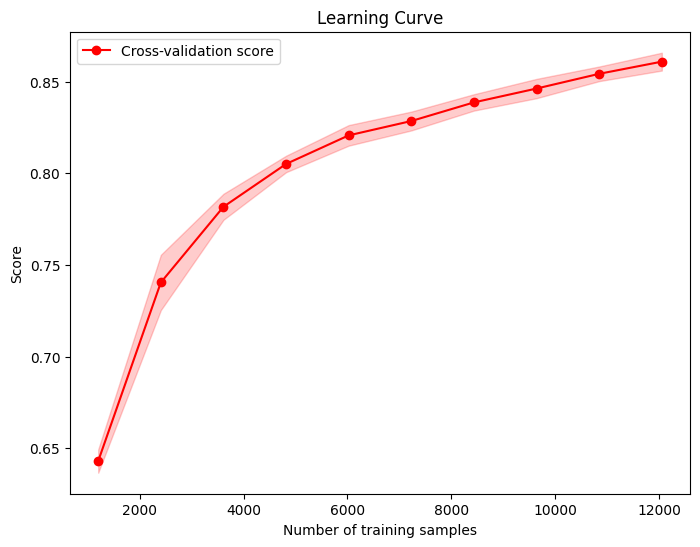

In [7]:
model = naive_bayes.MultinomialNB(alpha=0.2)
All_Models(model,"Naive Bayes Multinominal",xtrain_tfidf,train_y,xvalid_tfidf,valid_y)

<h1 style="color:red">Logistice Regression</h1>

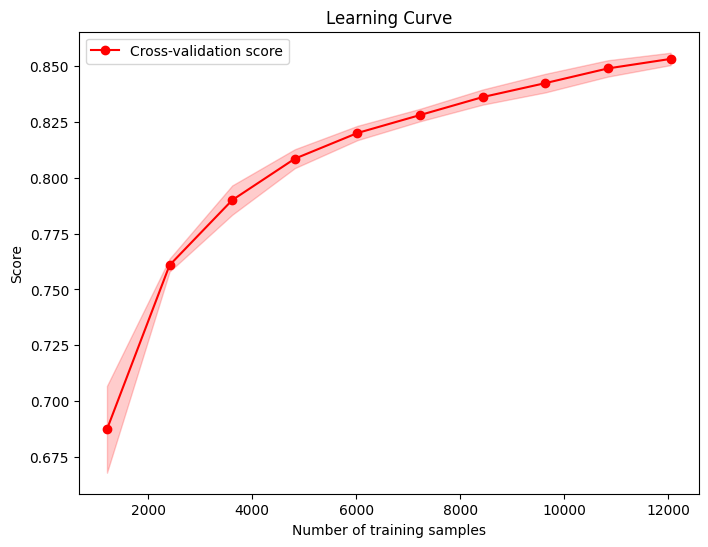

In [8]:
model = linear_model.LogisticRegression(max_iter=10000000)
All_Models(model,"Logistic Regression",xtrain_tfidf,train_y,xvalid_tfidf,valid_y)

<h1 style="color:red">Support Vector Machine</h1>

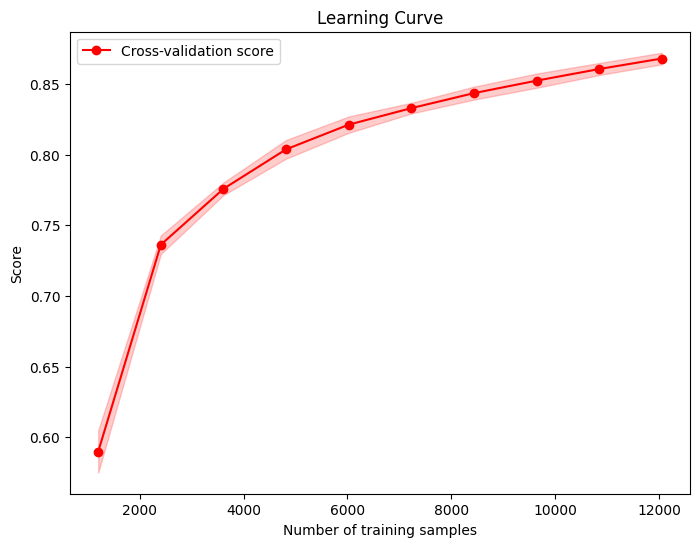

In [9]:
model = svm.SVC()
All_Models(model,"Support Vector Classifier",xtrain_tfidf,train_y,xvalid_tfidf,valid_y)

<h1 style="color:red">Random Forest</h1>

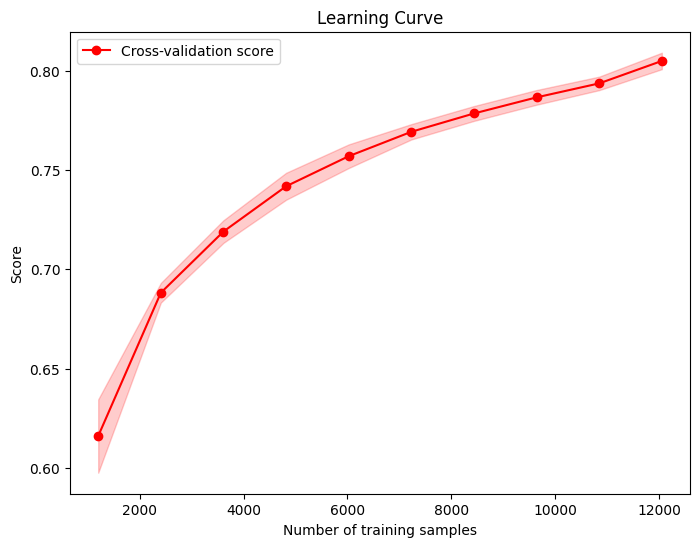

In [10]:
model =RandomForestClassifier(n_estimators=100, random_state=42)
All_Models(model,"Random Forest Classifier",xtrain_tfidf,train_y,xvalid_tfidf,valid_y)

<h1 style="color:red">Neural Network</h1>

In [11]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=xtrain_tfidf.shape[1]))
model.add(Dropout(0.5))  
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = xtrain_tfidf.toarray()
x_valid = xvalid_tfidf.toarray()
model.fit(x, train_y, epochs=10, batch_size=32, verbose=1)
model.save("pk1/NN_model.h5")



Epoch 1/10
471/471 [==============================] - 5s 8ms/step - loss: 2.0932 - accuracy: 0.3355
Epoch 2/10
471/471 [==============================] - 4s 8ms/step - loss: 0.8249 - accuracy: 0.7340
Epoch 3/10
471/471 [==============================] - 4s 8ms/step - loss: 0.4247 - accuracy: 0.8666
Epoch 4/10
471/471 [==============================] - 4s 8ms/step - loss: 0.2561 - accuracy: 0.9244
Epoch 5/10
471/471 [==============================] - 4s 8ms/step - loss: 0.1683 - accuracy: 0.9511
Epoch 6/10
471/471 [==============================] - 4s 8ms/step - loss: 0.1212 - accuracy: 0.9629
Epoch 7/10
471/471 [==============================] - 4s 8ms/step - loss: 0.1047 - accuracy: 0.9701
Epoch 8/10
471/471 [==============================] - 4s 8ms/step - loss: 0.0906 - accuracy: 0.9743
Epoch 9/10
471/471 [==============================] - 4s 8ms/step - loss: 0.0748 - accuracy: 0.9797
Epoch 10/10
471/471 [==============================] - 4s 8ms/step - loss: 0.0664 - accuracy: 0.9817